In [1]:
# for google colab
from google.colab import drive
# mount your Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# for google colab
# copy all files from "HW1" directory in Google drive to current directory
!cp -r ./gdrive/MyDrive/HW4/* .

In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import cm

## Load data

In [4]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [5]:
# 7000 data with 300 features
print(x_train.shape)
print(type(x_train))

(7000, 300)
<class 'numpy.ndarray'>


In [6]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [7]:
def cross_validation(x_train, y_train, k=5):
    returnList = list()
    folds = list()
    random_idx = np.arange(len(x_train))
    seed = 120
    np.random.seed(seed)
    np.random.shuffle(random_idx)
    n_split = len(x_train) // k

    #index = np.arrang(len(x_train))
    keep = 0
    for i in range(k):
        if i < len(x_train) % k:
            folds.append(random_idx[keep : keep + n_split + 1])
            keep += (n_split + 1)
        else:
            folds.append(random_idx[keep : keep + n_split])
            keep += n_split

    for i in range(k):
        returnList.append([np.setdiff1d(random_idx, folds[i]), folds[i]])
       
    return returnList

In [8]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [9]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  2  3  4  5  6  7  9 10 11 12 13 14 15 16 19], Validation index: [ 1  8 17 18]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  8 11 12 13 14 17 18 19], Validation index: [ 9 10 15 16]
Split: 3, Training index: [ 0  1  2  4  5  7  8  9 10 11 12 15 16 17 18 19], Validation index: [ 3  6 13 14]
Split: 4, Training index: [ 1  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19], Validation index: [ 0  2  4 12]
Split: 5, Training index: [ 0  1  2  3  4  6  8  9 10 12 13 14 15 16 17 18], Validation index: [ 5  7 11 19]


In [10]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [11]:
#clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [12]:
import math

best_parameters = [0] * 2 # [c, gamma]
best_accuracy = float('-inf')
folds_data = cross_validation(x_train, y_train, k=5)
accuracyTable = np.zeros((11, 9)) # [c, gamma] = accuracy
x_labels, y_labels = [0] * 9, [0] * 11

for i in range(-3, 8):
    c = math.pow(10, i)
    y_labels[i + 3] = c
    for j in range(-7, 2):
        gamma = math.pow(10, j)
        x_labels[j + 7] = gamma
        clf = SVC(C=c, kernel='rbf', gamma=gamma)
        score = 0
        for k in range(5):
            clf.fit(x_train[folds_data[k][0]], y_train[folds_data[k][0]])
            pred = clf.predict(x_train[folds_data[k][1]])
            score += accuracy_score(y_train[folds_data[k][1]], pred)
        score /= 5

        if best_accuracy < score:
            best_accuracy = score
            best_parameters = [c, gamma]
        
        accuracyTable[i + 3][j + 7] = score
        print('C: %s  gamma: %s  Accuracy: %s' % (c, gamma, score))

C: 0.001  gamma: 1e-07  Accuracy: 0.5638571428571428
C: 0.001  gamma: 1e-06  Accuracy: 0.5638571428571428
C: 0.001  gamma: 1e-05  Accuracy: 0.5652857142857143
C: 0.001  gamma: 0.0001  Accuracy: 0.5692857142857143
C: 0.001  gamma: 0.001  Accuracy: 0.5407142857142857
C: 0.001  gamma: 0.01  Accuracy: 0.5801428571428572
C: 0.001  gamma: 0.1  Accuracy: 0.48514285714285715
C: 0.001  gamma: 1.0  Accuracy: 0.48514285714285715
C: 0.001  gamma: 10.0  Accuracy: 0.48514285714285715
C: 0.01  gamma: 1e-07  Accuracy: 0.5638571428571428
C: 0.01  gamma: 1e-06  Accuracy: 0.5638571428571428
C: 0.01  gamma: 1e-05  Accuracy: 0.5652857142857143
C: 0.01  gamma: 0.0001  Accuracy: 0.5692857142857143
C: 0.01  gamma: 0.001  Accuracy: 0.5407142857142857
C: 0.01  gamma: 0.01  Accuracy: 0.5801428571428572
C: 0.01  gamma: 0.1  Accuracy: 0.48514285714285715
C: 0.01  gamma: 1.0  Accuracy: 0.48514285714285715
C: 0.01  gamma: 10.0  Accuracy: 0.48514285714285715
C: 0.1  gamma: 1e-07  Accuracy: 0.5638571428571428
C: 0.1  

In [13]:
print(best_parameters)

[1.0, 0.0001]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

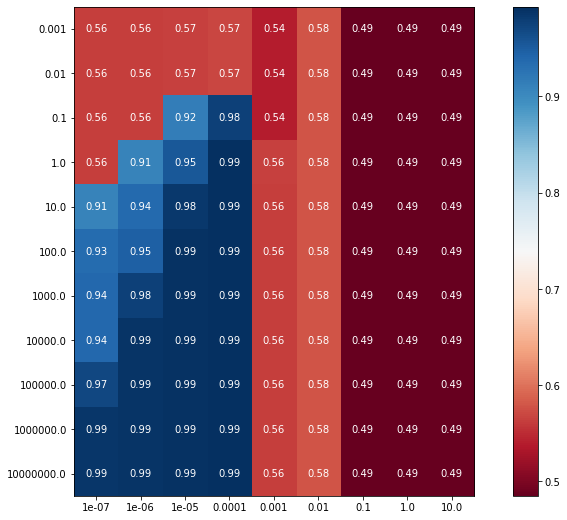

In [15]:
fig, ax = plt.subplots(figsize = (14, 9)) # plot sizze
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels) #plot value
ax.set_yticklabels(y_labels)
background_color = cm.get_cmap('RdBu') # set background color
im = ax.imshow(accuracyTable, background_color) # show the frame

for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        text = ax.text(i, j, round(accuracyTable[j][i], 2), horizontalalignment="center", verticalalignment="center", color="w")

# color bar
ax.figure.colorbar(im, ax=ax, cmap=background_color)

plt.savefig('Q3.png')
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [ ]:
best_model = SVC(C=best_parameters[0], kernel='rbf', gamma=best_parameters[1])
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))